<a href="https://colab.research.google.com/github/GK2831999/OOP/blob/main/CSE428_Lecture_2_Demo_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Sampling, quantization

In [ ]:
x = np.linspace(0, 1, 100)
#print(x)
y = np.sin(2*np.pi*x)

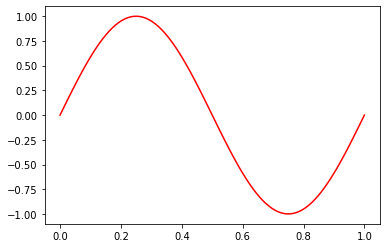

In [ ]:
plt.plot(x, y, 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


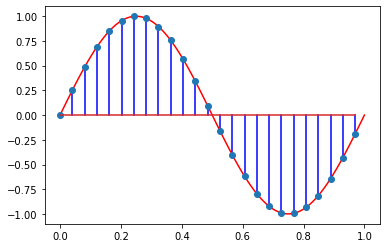

In [ ]:
# Sampling
n_times = 4
x_sampled = x[::n_times]
y_sampled = y[::n_times]

plt.plot(x, y, 'r')
plt.stem(x_sampled, y_sampled, 'b')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


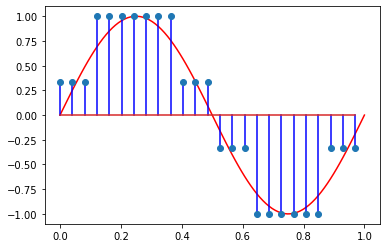

In [ ]:
L = 4
ymin = -1
ymax = 1
delta = (ymax - ymin)/(L-1)
n_delta = np.round((y_sampled - ymin)/delta)
y_q = ymin + n_delta*delta

plt.plot(x, y, 'r')
plt.stem(x_sampled, y_q, 'b')
plt.show()

In [ ]:
I = io.imread("/content/cat.jpg")

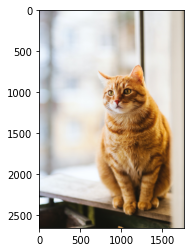

In [ ]:
plt.imshow(I)

In [ ]:
print(I.shape)

(2657, 1771, 3)


In [ ]:
print(type(I))

<class 'numpy.ndarray'>


In [ ]:
len(np.unique(I)) # 8 bit or 256 levels of quantizations

256

In [ ]:
print(type(I[0, 0, 0]))

<class 'numpy.uint8'>


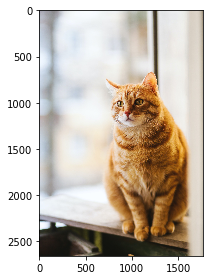

In [ ]:
io.imshow(I)

In [ ]:
Idouble = np.double(I)
print(type(Idouble[0, 0, 0]))

<class 'numpy.float64'>


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


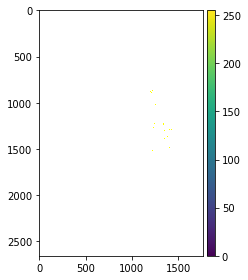

In [ ]:
io.imshow(Idouble)

In [ ]:
Idouble = Idouble/255

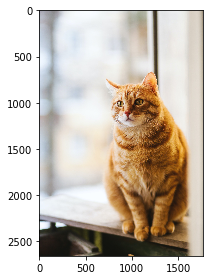

In [ ]:
io.imshow(Idouble)

In [ ]:
from skimage import img_as_float

In [ ]:
I_norm = img_as_float("/content/cat.jpg")

ValueError: ignored

# Problem with `np.uint8`

In [ ]:
x = np.uint8(100)
y = np.uint8(200)

In [ ]:
print(x)
print(y)
print(x+y)

100
200
44


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# solution 1 
Idouble = np.double(I)
# procesing
Idouble[Idouble < 0] = 0
Idouble[Idouble > 255] = 255
I_final = Idouble.astype(np.uint8)

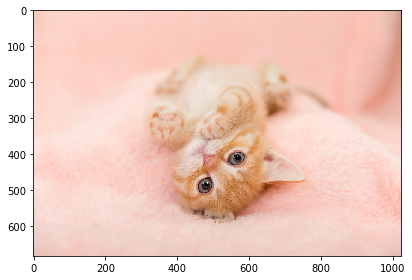

In [ ]:
io.imshow(I_final)

In [ ]:
# solution 2
Idouble = np.double(I)
Idouble = Idouble/255
# procesing
Idouble[Idouble < 0] = 0
Idouble[Idouble > 255] = 1
Idouble = np.round(Idouble*255)

I_final = Idouble.astype(np.uint8)

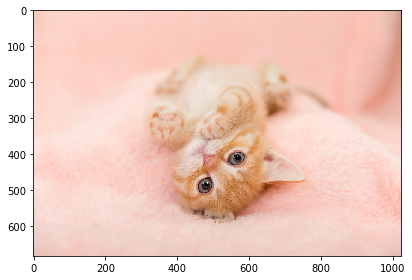

In [ ]:
io.imshow(I_final)

In [ ]:
from skimage import color

In [ ]:
I_bw = color.rgb2gray(I)

In [ ]:
I_bw.shape

(2657, 1771)

In [ ]:
I_bw = I_bw*255

In [ ]:
I_converted = I_bw.astype(np.uint8)

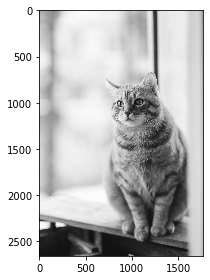

In [ ]:
io.imshow(I_converted)

# Downsampling and Quantization

In [ ]:
I2 = I_converted.copy()

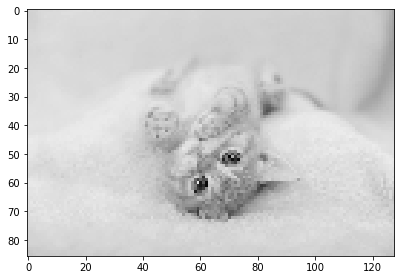

In [ ]:
k = 8
Idown = I2[::k, ::k]
io.imshow(Idown)

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
new_arr = np.floor(arr/2)*2
print(new_arr)

[0. 0. 2. 2. 4. 4. 6. 6.]


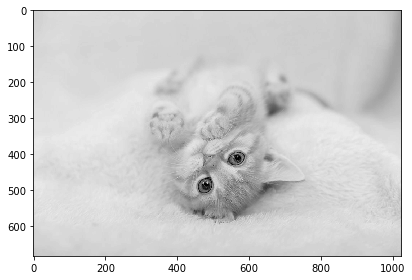

In [ ]:
kk = 2.0
Iq2 = kk*np.floor(I2/kk)
Iq2 = Iq2.astype(np.uint8)
io.imshow(Iq2)

# Upsampling and Interpolation

`order`

`0: Nearest-neighbor`

`1: Bi-linear (default)`

`2: Bi-quadratic`

`3: Bi-cubic`

`4: Bi-quartic`

`5: Bi-quintic`

In [ ]:
from skimage import transform

(683, 1024)


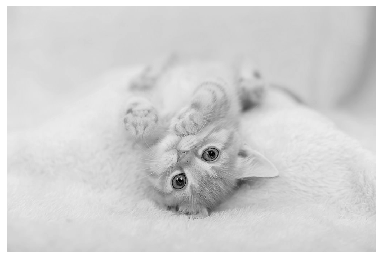

In [ ]:
io.imshow(I2)
print(I2.shape)
plt.axis("off")
plt.show()

(86, 128)


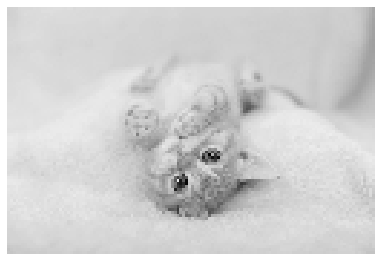

In [ ]:
io.imshow(Idown)
print(Idown.shape)
plt.axis("off")
plt.show()

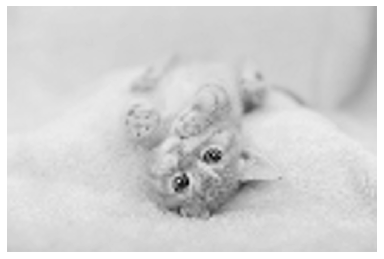

In [ ]:
k = 8
I3 = I2[:680, :]
Idown = I3[::k, ::k]

Iup = transform.rescale(Idown, k, order=3)
io.imshow(Iup)
plt.axis("off")
plt.show()


In [ ]:
#MSE = mean square error
mse = np.sum((I3/225.0 - Iup)**2)/np.prod(I3.shape)
print(mse)

0.012745624681020851


In [ ]:
Iup

array([[0.81939673, 0.8189542 , 0.81863219, ..., 0.65591419, 0.66003382,
        0.66548121],
       [0.81991873, 0.8194762 , 0.81915631, ..., 0.65657996, 0.66066937,
        0.66607831],
       [0.82031638, 0.81987173, 0.81955183, ..., 0.65710882, 0.66116946,
        0.6665418 ],
       ...,
       [0.77435915, 0.77220073, 0.77055897, ..., 0.78229656, 0.78210583,
        0.78186406],
       [0.77570022, 0.77358546, 0.77197466, ..., 0.78525523, 0.78476807,
        0.78415071],
       [0.77752274, 0.77546641, 0.77389714, ..., 0.78908701, 0.78821576,
        0.78711199]])